In [17]:
# To perform operations on dataset
import random as rand
import pandas as pd

import numpy as np
import pathlib


# Machine learning model

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier



# Visualization

from sklearn import metrics

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.tree import export_graphviz

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
n = 4
file_name = 'dataset_'+ str(n) + '.csv'
dataset_path = './dataset/' + file_name

models = [
    {"model": LogisticRegression(max_iter=10000),"name":"LogisticRegression"},
    {"model": DecisionTreeClassifier(),"name":"DecisionTreeClassifier"},   
    {"model":RandomForestClassifier(),"name":"RandomForestClassifier"}
]

scores = []


common_features = ['pop_up_window','using_ip_address','at_symbol','favicon','iframe','submit_info_email','double_slash']

#READ dataset


df = pd.read_csv(dataset_path)
df.head()

,id,using_ip_address,URLURL_Length,Shortining_Service,at_symbol,double_slash,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,pop_up_window,iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [18]:
### Obtiene las mejores 'n' features de un dataset, utilizando el método 'feature importance'
def get_best_features(X, y, n):
    model = ExtraTreesClassifier()
    model.fit(X,y)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    return feat_importances.nlargest(n);
### Ejecuta el método 'cross_val_score' con un array de modelos
def run_cross_val_score(models, lX, ly, k):
    _scores = []
    for model in models:
        score = cross_val_score(model['model'], lX, ly,cv=k)
        print("model_name", model["name"],"avg", np.average(score),"std",np.std(score))
        _scores.append({"model_name":model["name"],"avg": np.average(score),"std":np.std(score)})
    return _scores;

### Ejecuta el método 'cross_val_predict' con un array de modelos
def run_cross_val_predict(models, lX, ly, k):
    _predictions = []
    for model in models:
        predictions = cross_val_predict(model['model'], lX, ly, cv=k)
        accuracy = metrics.r2_score(ly, predictions)
        plt.scatter(ly, predictions)
        #score = cross_val_score(model['model'], lX, ly,cv=10)
        print("model_name", model["name"],"accuracy", accuracy)
        _predictions.append({"model_name":model["name"],"accuracy": accuracy})
    return _predictions;

def run_predict(models, X_test, y_test):
    _predictions = []
    for model in models:
        y_pred = model["model"].predict(X_test)
        score = model["model"].score(X_test, y_test)
        print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(score))
        _predictions.append({"model_name":model["name"],"score": score})
    return _predictions;

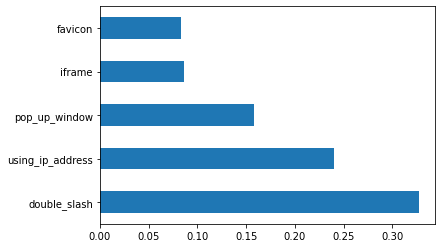

In [19]:
# feature selection, using feature importance

#number of features, without 'id' & 'result'
c = len(df.columns) - 2

X = df[common_features]  #independent common columns
y = df.iloc[:,-1]    #target column i.e price range

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
X_train_common_features = X_train[common_features]

feat_importances = get_best_features(X, y, 5)
feat_importances.plot(kind='barh')
plt.show()
X_train_best_features = X_train[feat_importances.index.to_numpy()]

X_test_best_features = X_test[feat_importances.index.to_numpy()]

In [20]:
# obtiene el scoring sobre el conjunto de datos de entrenamiento
#scores = np.concatenate((scores, run_cross_val_score(models, X_train, y_train, 10)))

feat_importances = get_best_features(df.iloc[:,:c], df.iloc[:,-1], c)
print(feat_importances)
#feat_importances.plot(kind='barh')
#plt.show()

SSLfinal_State                 0.316769
URL_of_Anchor                  0.232238
web_traffic                    0.063217
Prefix_Suffix                  0.049232
having_Sub_Domain              0.048005
id                             0.044657
Links_in_tags                  0.040267
Request_URL                    0.022183
SFH                            0.021032
Links_pointing_to_page         0.018189
Domain_registeration_length    0.016693
age_of_domain                  0.015565
using_ip_address               0.012229
Google_Index                   0.012083
Page_Rank                      0.011283
DNSRecord                      0.010646
URLURL_Length                  0.008597
HTTPS_token                    0.006278
submit_info_email              0.005837
Redirect                       0.005485
Shortining_Service             0.005291
at_symbol                      0.004852
pop_up_window                  0.004697
favicon                        0.004640
Abnormal_URL                   0.004630


In [21]:
# obtiene el scoring sobre el conjunto de datos de entrenamiento, teniendo en cuenta solo las features en común encontradas
scores = np.concatenate((scores, run_cross_val_score(models, X_train_common_features, y_train, 10)))

model_name LogisticRegression avg 0.5829921773142112 std 0.012181775831437496
model_name DecisionTreeClassifier avg 0.6229084541248051 std 0.010637770829862857
model_name RandomForestClassifier avg 0.6231346984686965 std 0.010351807658053575


In [22]:
# obtiene el scoring sobre el conjunto de datos de entrenamiento, teniendo en cuenta solo las mejores features obtenidas
scores = np.concatenate((scores, run_cross_val_score(models, X_train_best_features, y_train, 10)))

model_name LogisticRegression avg 0.5853669759950916 std 0.011570200084678425
model_name DecisionTreeClassifier avg 0.6163486463685868 std 0.008555813808746971
model_name RandomForestClassifier avg 0.6170269959352712 std 0.008469525780666724


model_name LogisticRegression accuracy -0.5939146491999823
model_name DecisionTreeClassifier accuracy -0.5181020034723729
model_name RandomForestClassifier accuracy -0.5218001813127442


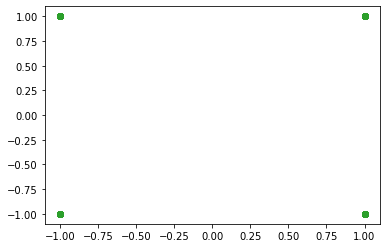

In [23]:
# realiza una predicción sobre el conjunto de datos de test, teniendo en cuenta solo las mejores features obtenidas
predictions = run_cross_val_predict(models,X_test_best_features,y_test,10)
#predictions = run_predict(models,X_test_best_features,y_test)

model_name LogisticRegression accuracy 1.0
model_name DecisionTreeClassifier accuracy 1.0
model_name RandomForestClassifier accuracy 1.0


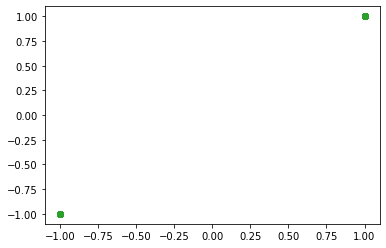

In [24]:
predictions = run_cross_val_predict(models,X_test,y_test,10)